In [63]:
# Compulsory Task 2 - Hourly Wage Data

#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

#Importing the dataset and dealing with missing values
data = pd.read_csv("hourlywagedata.csv", na_values = ' ')

# Get an idea of the data
data.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234
1,0,1,2,16.440731
2,0,1,3,21.389108
3,1,1,1,11.377187
4,0,1,3,21.560778


In [64]:
# Cleaning the data

missing = data.isnull().sum()

missing[0:5]

# We can see that there are 89 values missing for hourlywage

position     0
agerange     0
yrsscale     0
hourwage    89
dtype: int64

In [65]:
# Remove rows with missing values

data = data.dropna()


In [66]:
# Convert hourwage column to float

data["hourwage"] = data["hourwage"].astype(float)

print(data.dtypes)

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object


In [67]:
# Show 3 plots, showing each of the independent variables against the hourwage

# Plot 1 : position against hourwage

x = data.iloc[:,0].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

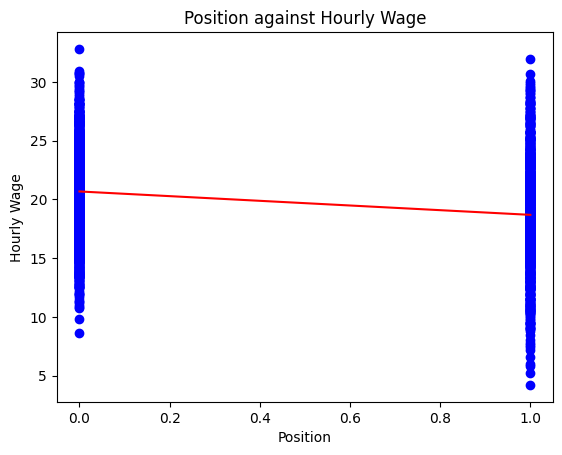

Coefficients: 
 [[-1.99045606]]


In [68]:
# create an empty linear regression model 
position_model = LinearRegression()

# to create the model, we use fit(x,y)
position_model.fit(x,y)

y_pred = position_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,position_model.predict(x),color = 'r')
plt.title('Position against Hourly Wage')
plt.xlabel('Position')
plt.ylabel('Hourly Wage')
plt.show()

print('Coefficients: \n', position_model.coef_)

# On average those who work in the hospital(0) earn more than those in the office(1).

In [69]:
# Plot 2 : age against hourwage

x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

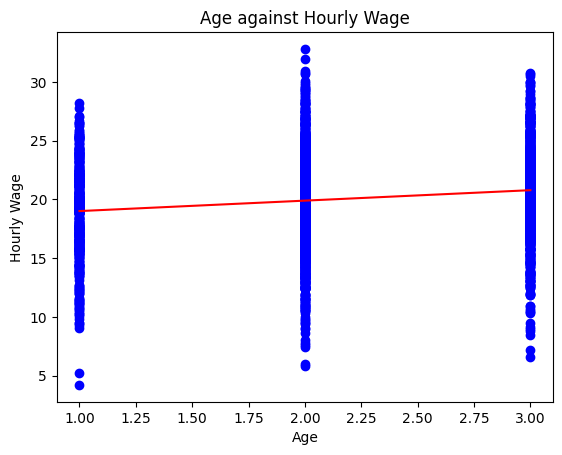

Coefficients: 
 [[0.88850056]]


In [70]:
# create an empty linear regression model 
age_model = LinearRegression()

# to create the model, we use fit(x,y)
age_model.fit(x,y)

y_pred = age_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,age_model.predict(x),color = 'r')
plt.title('Age against Hourly Wage')
plt.xlabel('Age')
plt.ylabel('Hourly Wage')
plt.show()

print('Coefficients: \n', age_model.coef_)

# Positive correlation. As age increases, hourly wage increases.

In [71]:
# Plot 3 : years worked against hourwage

x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

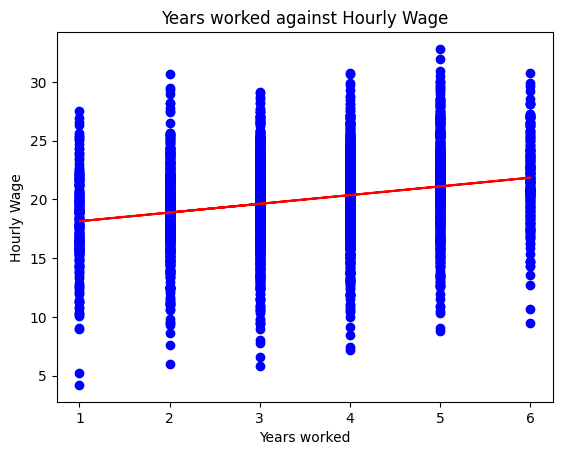

Coefficients: 
 [[0.74136709]]


In [72]:
# create an empty linear regression model 
yrs_model = LinearRegression()

# to create the model, we use fit(x,y)
yrs_model.fit(x,y)

y_pred = yrs_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,yrs_model.predict(x),color = 'r')
plt.title('Years worked against Hourly Wage')
plt.xlabel('Years worked')
plt.ylabel('Hourly Wage')
plt.show()

print('Coefficients: \n', yrs_model.coef_)

# Positive correlation. As years worked increases, hourly wage increases.

In [73]:
# Generate a multi linear regression using all the variables

X = data.iloc[:,[0, 1, 2]].values
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# create an empty linear regression model 
hosp_model = LinearRegression()

# to create the model, we use fit(x,y)
hosp_model.fit(X,y)

# Training and test with an 80:20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2328, 3) (2328, 1)
Test data: (583, 3) (583, 1)


In [74]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [18.82053903]
Coefficients: 
 [[-1.96114722 -0.34023222  3.86840893]]


In [76]:
# Generate some predictions
predictions[0:5]

array([[21.57503395],
       [20.19778649],
       [20.3679026 ],
       [19.01032106],
       [20.97146828]])

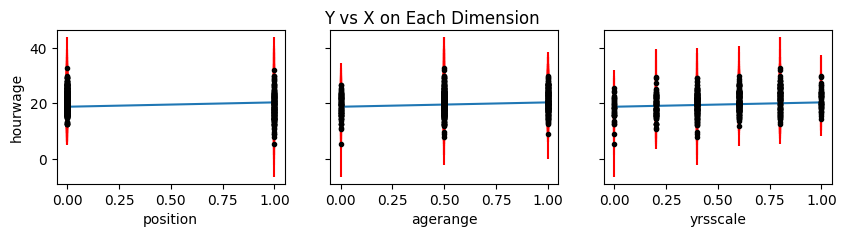

In [77]:
# Error plot for my predictions

fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(10,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Plot Line of Best Fit
for i in range(X_test.shape[1]):
    ax[i].plot(X_line[:,i], y_line[:,0])
    ax[i].set_xlabel(data.columns[i])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot error bars 
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red')

In [78]:
# Computing the root mean squared error

print ("Score:", model.score(X_test, y_test))

# This score is quite close to 0, which suggests that our model does not fit the observations very well.

Score: 0.12851025561142626
